In [2]:
from scipy.io import loadmat
from os import listdir
from os.path import isfile, join
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import shutil

In [3]:
# try to draw image with bounding boxes
# load the object ground truth files first
# 바운딩 박스 정보 들어있는 txt 파일 열어서 objects_onshore/onboard/nir 배열에 추가

objects_onshore = []
with open("objects_onshore.txt") as f:
    for line in f: 
        line = line.strip()
        objects_onshore.append(line)
        
objects_onboard = []
with open("objects_onboard.txt") as f:
    for line in f: 
        line = line.strip()
        objects_onboard.append(line)
        
objects_nir = []
with open("objects_nir.txt") as f:
    for line in f: 
        line = line.strip()
        objects_nir.append(line)

In [4]:
print(objects_nir[0]) #텍스트 파일에서 읽어온 한 줄 = [index]

MVI_1532_NIR_frame0.jpg,2.9468988954970143,502.16525063721315,182.70178419711132,40.78164825828378,3,2,1


In [5]:
def object_type_count(frame_path, type_count):
    # frame_path : 프레임이 저장되어 있는 경로

    file_list = os.listdir(frame_path)
    
    for frame_name in file_list:
        
        relevant_objects_onshore = [i for i in objects_onshore if i.startswith(frame_name)] # onshore 한 이미지의 객체 수
        relevant_objects = relevant_objects_onshore
        
        if len(relevant_objects_onshore) == 0:
            relevant_objects_onboard = [i for i in objects_onboard if i.startswith(frame_name)] # onboard 한 이미지의객체 수
            relevant_objects = relevant_objects_onboard
            
            if len(relevant_objects_onboard) == 0:
                relevant_objects_nir = [i for i in objects_nir if i.startswith(frame_name)] # nir 한 이미지의 객체 수
                relevant_objects = relevant_objects_nir
                
                if len(relevant_objects_nir) == 0: # 객체 없는 이미지
                    # print(frame_name)
                    continue 
              
            
     # for every object in frame crate a rectangle patch
        for entry in relevant_objects:
            data = entry.split(',')
            
            object_type = int(data[5])-1 
            #print(object_type)
            
            type_count[object_type] += 1
    
    print(type_count)
    

In [23]:
TRAIN_PATH=('./train')
VALID_PATH=('./valid')
TRAIN_TYPE_COUNT=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
VALID_TYPE_COUNT=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

object_type_count(TRAIN_PATH, TRAIN_TYPE_COUNT)
object_type_count(VALID_PATH, VALID_TYPE_COUNT)

[1482, 531, 24746, 1469, 226, 633, 433, 0, 132, 4724]
[755, 219, 9851, 758, 156, 232, 183, 0, 99, 1688]


In [17]:
# swimming person 추가 62/21
TRAIN_TYPE_COUNT=[1482, 531, 24746, 1469, 226, 633, 433, 62, 132, 4724]
VALID_TYPE_COUNT=[755, 219, 9851, 758, 156, 232, 183, 21, 99, 1688]

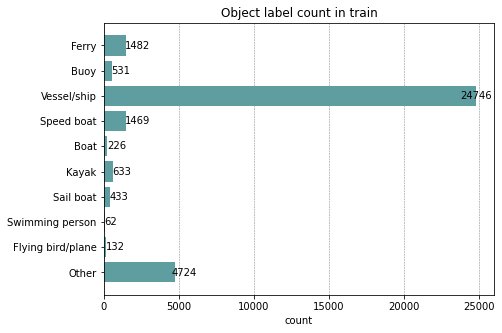

In [22]:
object_name = ['Ferry', 'Buoy', 'Vessel/ship', 'Speed boat', 'Boat', 'Kayak', 'Sail boat', 'Swimming person', 'Flying bird/plane', 'Other']

fig, ax = plt.subplots(1,1,figsize=(7,5))
rects = plt.barh(object_name, TRAIN_TYPE_COUNT,  color='cadetblue')
plt.title("Object label count in train")
plt.xlabel("class")
plt.xlabel("count")
plt.gca().invert_yaxis() # y축 역순

for i, rect in enumerate(rects):
    ax.text(0.96 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(TRAIN_TYPE_COUNT[i]), va='center')
    
#보조선(눈금선) 나타내기
ax.set_axisbelow(True)
ax.xaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)

plt.savefig('Object_label_count_in_training.png', dpi=300)
plt.show()

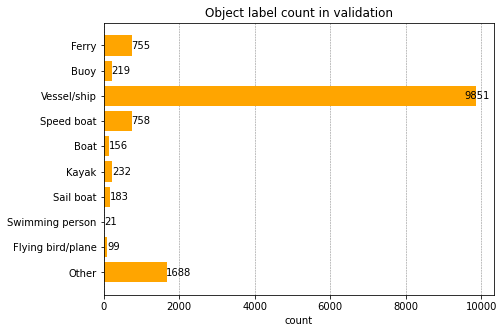

In [20]:
object_name = ['Ferry', 'Buoy', 'Vessel/ship', 'Speed boat', 'Boat', 'Kayak', 'Sail boat', 'Swimming person', 'Flying bird/plane', 'Other']

fig, ax = plt.subplots(1,1,figsize=(7,5))
rects = plt.barh(object_name, VALID_TYPE_COUNT, color='orange')
plt.title("Object label count in validation")
plt.xlabel("class")
plt.xlabel("count")
plt.gca().invert_yaxis() # y축 역순

for i, rect in enumerate(rects):
    ax.text(0.97 * rect.get_width(), rect.get_y() + rect.get_height() / 2.0, str(VALID_TYPE_COUNT[i]), va='center')
    

#보조선(눈금선) 나타내기
ax.set_axisbelow(True)
ax.xaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)

plt.savefig('Object_label_count_in_validation.png', dpi=300)
plt.show()

In [10]:
print("TRAIN COUNT :",1482+531+24746+1469+226+633+433+132+4724)
print("VALID COUNT :",755+219+9851+758+156+232+183+99+1688)

TRAIN COUNT : 34376
VALID COUNT : 13941
